# Propriétés d'une population fictive de 130 personnes: analyse quantitative bivariée

Version du 5 mai 2023

130 individus, cinq caractères: age, personnes dans le même foyer, fréquence de lecture du journal, orientation politique, revenu mensuel




## Importer les librairies nécessaires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

## Références bibliographiques

Référence:

* [Statistique descriptive bidimensionnelle](http://wikistat.fr/pdf/st-l-des-bi.pdf) (Site Wikistat)


Compléments:

* Hamon : Hamon Philippe, Hamon Agnès, et Jégou Nicolas, _Statistique descriptive. Cours et exercices corrigés_, Rennes, PUR, 2008.
* __Bennani__: Bennani Dosse Mohammed, _Statistique bivariée avec R_, Rennes, PUR, 2011.
* Saly : Saly Pierre, _Méthodes statistiques descriptives pour les historiens_, Paris, A. Colin, 1991.
* [Statology - Tutorials](https://www.statology.org/tutorials/)



## Explorer les observations

* Regrouper et inspecter : la distribution
* Afficher et analyser : les graphiques

In [2]:
### Lire le fichier corrigé manuellement – ne pas effacer !

path = 'data/observations_mod.csv'

obs = pd.read_csv(path)
obs.set_index('id', inplace=True)
obs.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel
id,,,,,
1,44,3,de temps en temps,droite,9660
2,45,1,tous les jours,droite,7364
3,54,3,de temps en temps,droite,8947
4,86,2,tous les jours,populiste,6317
5,77,2,tous les jours,gauche,6511


In [3]:
## Nombre de lignes et de colonnes du tableau
obs.shape

(130, 5)

In [4]:
# Informations détaillées
obs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 1 to 130
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              130 non-null    int64 
 1   n_foyer          130 non-null    int64 
 2   lecture_journal  130 non-null    object
 3   parti            130 non-null    object
 4   revenu_mensuel   130 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.1+ KB


# Comparaison de deux variables quantitatives

### Un exemple (fictif) concernant le rapport entre la surface et les prix de l'immobilier

Exemple original tiré de: Bennani, p.97, exercice 2

#### Regression linéaire

* https://data36.com/linear-regression-in-python-numpy-polyfit/


In [5]:
## Quelques valeurs ajoutées
appartements = {'surface': [23, 36, 50, 56,   60, 58, 55,  62,  64, 66,     75,  85, 91, 105, 113, 117],
                   'prix': [75,148,216, 230, 282, 331, 230, 250, 280, 233, 358, 379, 370, 602, 640, 488]}
### Valeurs originales
# appartements = {'surface': [23,36,50,60,62,66,75,105, 113, 117],
#                'prix': [75, 148, 216, 282, 331, 233, 358, 602, 640, 488]}

df_app = pd.DataFrame(appartements); df_app.head()

,surface,prix
0,23,75
1,36,148
2,50,216
3,56,230
4,60,282


In [84]:
def plot_densites (data_frame, rows, cols):
    ## https://engineeringfordatascience.com/posts/matplotlib_subplots/
    plt.figure(figsize=(18, 4))
    plt.subplots_adjust(wspace=0.5)
    plt.suptitle("Distributions et densités", fontsize=18, y=1)

    e=data_frame.columns

    # loop through the length of tickers and keep track of index
    for n, e in enumerate(e):
        
        #plt.figure(figsize=(10,4))
        # add a new subplot iteratively
        ax = plt.subplot(rows, cols, n + 1)

        # filter df and plot ticker on the new subplot axis
        vals = data_frame[e]
        plt.hist(vals, density=True)
        ax = vals.plot.kde()
        ax.set_xlim(min(vals),max(vals))

        ### Test de Shapiro-Wilk: hypothèse H0 = distribution normale    
        sa = round(stats.shapiro(vals).pvalue, 4)
        psa = (f"Test Shapiro-Wilk,pvalue: {sa}, on accepte l'H0: distribution normale" if sa > 0.049 \
               else f"pvalue: {sa},Test de Shapiro-Wilk on peut rejeter l'H0: distrib. non normale")

        plt.xlabel(psa, fontsize=10)

        ax.set_title(f'Variable: {e}', fontsize=12)


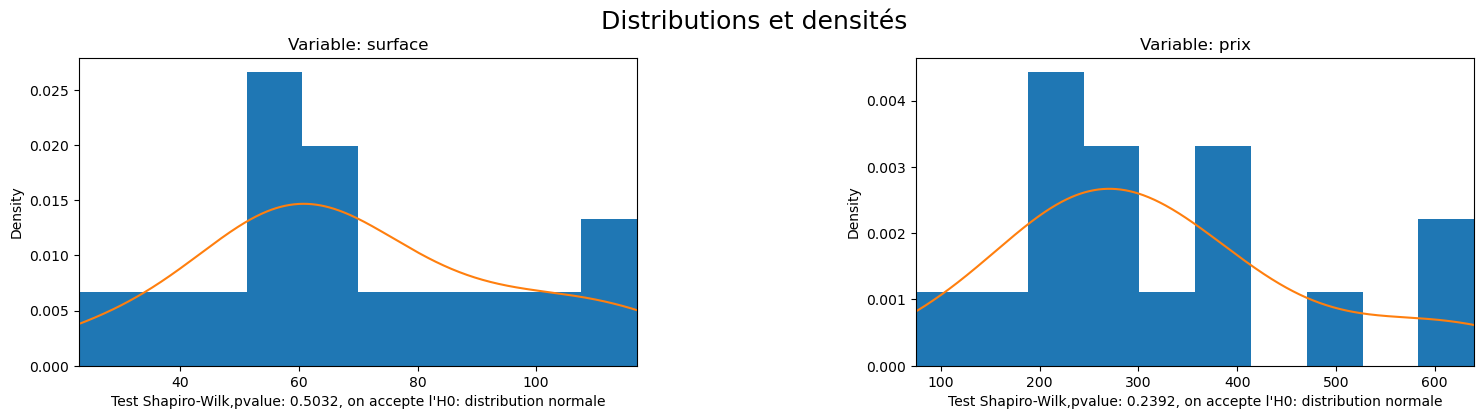

In [85]:
plot_densites(df_app, 1,2)

### Distribution 'normale'
Le résultat du test de Shapiro-Wilk montre que l'hypothèse H0:"il s'agit d'une distribution normale" ne peut pas être rejetée; la forme relativement normale de la distribution est confirmée par la représentation graphique.

On peut donc calculer le coefficient de correlation de Pearsons, ce qui est admis pour les variables continues ayant une distribution approximativement normale

Slope: 5.4280825173495595, intercept: -59.108755585131725
Coeff. de Pearsons: 0.9413


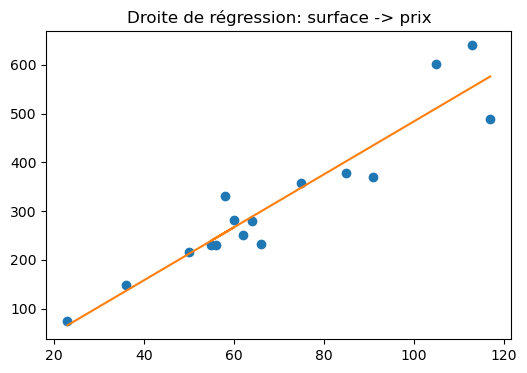

In [86]:
## Nuage de points avec droite de régression
# https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python

fig = plt.figure(figsize=(6,4))
x = np.array(df_app['surface'])
y = np.array(df_app['prix'])





plt.plot(x, y, 'o')
plt.title("Droite de régression: surface -> prix")


# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)


plt.plot(x, m*x + b)

print(f'Slope: {m}, intercept: {b}')
# https://www.statology.org/pearson-correlation-coefficient/
print('Coeff. de Pearsons: {}'.format(np.corrcoef([x,y])[1][0].round(4)))
plt.draw()

In [93]:
from scipy.stats import linregress
linregress(x, y)

LinregressResult(slope=62.988010655718654, intercept=4863.432579660465, rvalue=0.23328338312682517, pvalue=0.00756008748137573, stderr=23.2069453962382, intercept_stderr=1246.090461264152)

## Comparer l'âge et le revenu 

In [68]:
### Centralité et dispersion du revenu
obs['revenu_mensuel'].describe().round(2)

count      130.00
mean      7984.73
std       5604.53
min       1400.00
25%       4399.00
50%       7275.50
75%       9236.25
max      45000.00
Name: revenu_mensuel, dtype: float64

<Axes: >

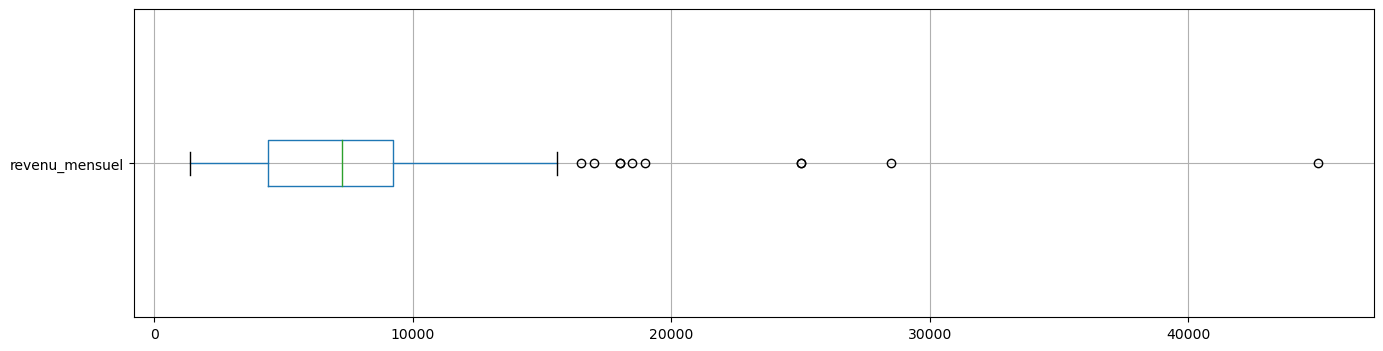

In [69]:
obs.boxplot(column=['revenu_mensuel'], vert=False, figsize=(16,4))

In [70]:
### Eliminer les valeurs extrêmes qui pourront être examinées à part
obs.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel
id,,,,,
1,44,3,de temps en temps,droite,9660
2,45,1,tous les jours,droite,7364
3,54,3,de temps en temps,droite,8947
4,86,2,tous les jours,populiste,6317
5,77,2,tous les jours,gauche,6511


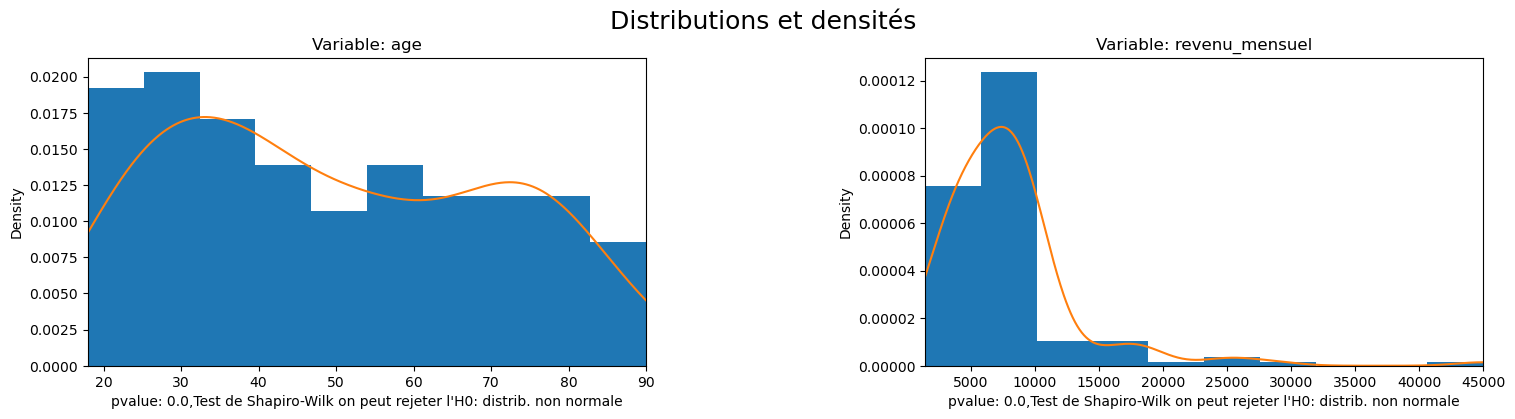

In [88]:
plot_densites(obs[['age', 'revenu_mensuel']], 1,2)

## Droite de régression linéaire

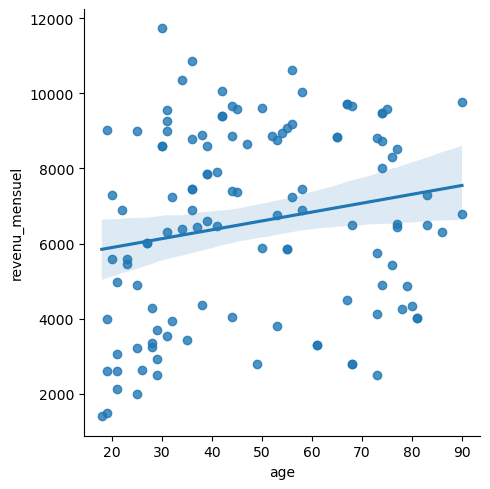

In [128]:
### https://seaborn.pydata.org/generated/seaborn.lmplot.html

#fig = plt.figure(figsize=(15, 10))

_= sns.lmplot(x="age", y="revenu_mensuel", data=a);
plt.show()

Coeff. de Pearsons: 0.2333
LinregressResult(slope=62.988010655718654, intercept=4863.432579660465, rvalue=0.23328338312682517, pvalue=0.00756008748137573, stderr=23.2069453962382, intercept_stderr=1246.090461264152)


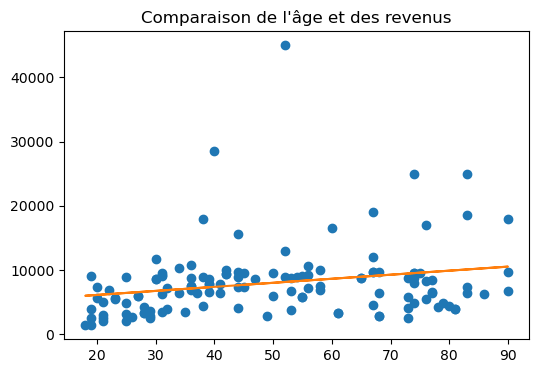

In [89]:
## Nuage de points avec droite de régression
# https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python

fig = plt.figure(figsize=(6,4))
x = np.array(obs['age'])
y = np.array(obs['revenu_mensuel'])





plt.plot(x, y, 'o')
plt.title("Comparaison de l'âge et des revenus")


# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

print('Coeff. de Pearsons: {}'.format(np.corrcoef([x,y])[1][0].round(4)))
print(linregress(x, y))
plt.draw()

### Corrélation entre: âge-revenu ?

In [104]:
### https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
res = stats.pearsonr(obs['age'], obs['revenu_mensuel'])
res.statistic, res.pvalue

(0.23328338312682514, 0.007560087481375731)

In [105]:
### Coéfficient de corrélation de Pearsons: 
# à NE PAS UTILISER dans ce cas car seulement une corrélation linéaire est pertinente 
# et la distribution des deux variables doit être normale
# https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html
np.corrcoef([x,y])[1][0].round(4)

0.2333

### Utiliser coefficient de correlation de Spearman

In [106]:
### https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html
res = stats.spearmanr(obs[['age', 'revenu_mensuel']])
res.statistic, res.pvalue

(0.29934306807605554, 0.0005406633142315596)

In [107]:
### Spearman correlation coefficient in pandas
#  https://stackabuse.com/calculating-spearmans-rank-correlation-coefficient-in-python-with-pandas/
corr_spear = obs[['age','revenu_mensuel']].corr(method="spearman")
# corr_spear
corr_spear.iloc[0,1]


0.2993430680760555

In [109]:
### Le filtre sur l'âge augmente la corrélation
#  https://stackabuse.com/calculating-spearmans-rank-correlation-coefficient-in-python-with-pandas/
corr_spear = obs[obs['age'] < 50][['age','revenu_mensuel']].corr(method="spearman")
# corr_spear
corr_spear.iloc[0,1]


0.5483214948641095

In [113]:
### Le filtre sur les révénus diminue la correlation (observer le graphique de nuage de points ci-dessous)
#  https://stackabuse.com/calculating-spearmans-rank-correlation-coefficient-in-python-with-pandas/
corr_spear = obs[obs['revenu_mensuel'] < 10000][['age','revenu_mensuel']].corr(method="spearman")
# corr_spear
corr_spear.iloc[0,1]


0.2710589808071554

Coeff. de Pearsons: 0.1903


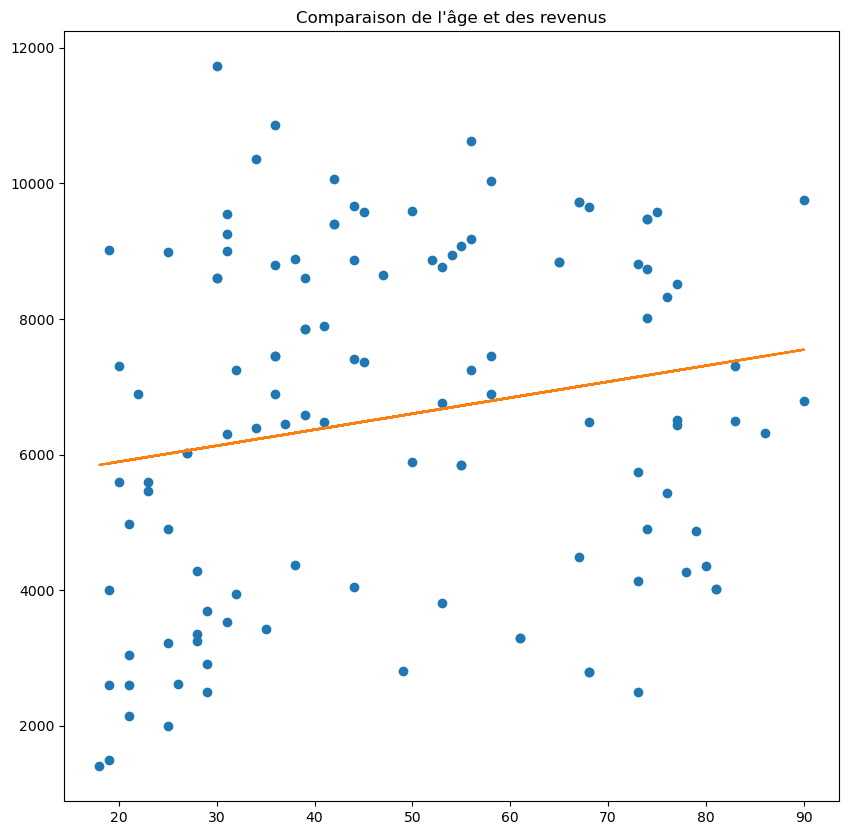

In [114]:
### Nuage de points avec droite de régression: explorer les filtrages de manière dynamique
# Filtrer sur les plus jeunes — filtrer sur les revenus plus homogènes
# Comparer la droite de régression et le coefficient de Pearsons
# https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python

"""
x = np.array(obs[obs['revenu_mensuel'] < 12000]['age'])
y = np.array(obs[obs['revenu_mensuel'] < 12000]['revenu_mensuel'])
"""
x = np.array(obs[obs['revenu_mensuel'] < 12000]['age'])
y = np.array(obs[obs['revenu_mensuel'] < 12000]['revenu_mensuel'])


"""
x = np.array(obs[obs['age'] < 50]['age'])
y = np.array(obs[obs['age'] < 50]['revenu_mensuel'])
"""


plt.rcParams["figure.figsize"] = [10,10]

plt.plot(x, y, 'o')
plt.title("Comparaison de l'âge et des revenus")


# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

print('Coeff. de Pearsons: {}'.format(np.corrcoef([x,y])[1][0].round(4)))
plt.show()

### Inspection des revenus par génération

In [116]:
### Ajouter une colonne avec codage des années de naissance 
# en relation avec des classes significatives au point de vue heuristique du domaine étudié,
# modifiables en fonction de la problématique 
# Par exemple: en formation, jeunes travailleurs, travailleurs expérimentés, travailleurs seniors, préretraite, retraités
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

generations = [18, 26, 36, 46, 56, 66, 91]
obs['generation_heur'] = pd.cut(obs['age'], generations, right=False)

### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a arrondi les valeurs
obs['generation_heur'] = obs['generation_heur'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
obs.head(3)

,age,n_foyer,lecture_journal,parti,revenu_mensuel,generation_heur
id,,,,,,
1,44,3,de temps en temps,droite,9660,36-45
2,45,1,tous les jours,droite,7364,36-45
3,54,3,de temps en temps,droite,8947,46-55


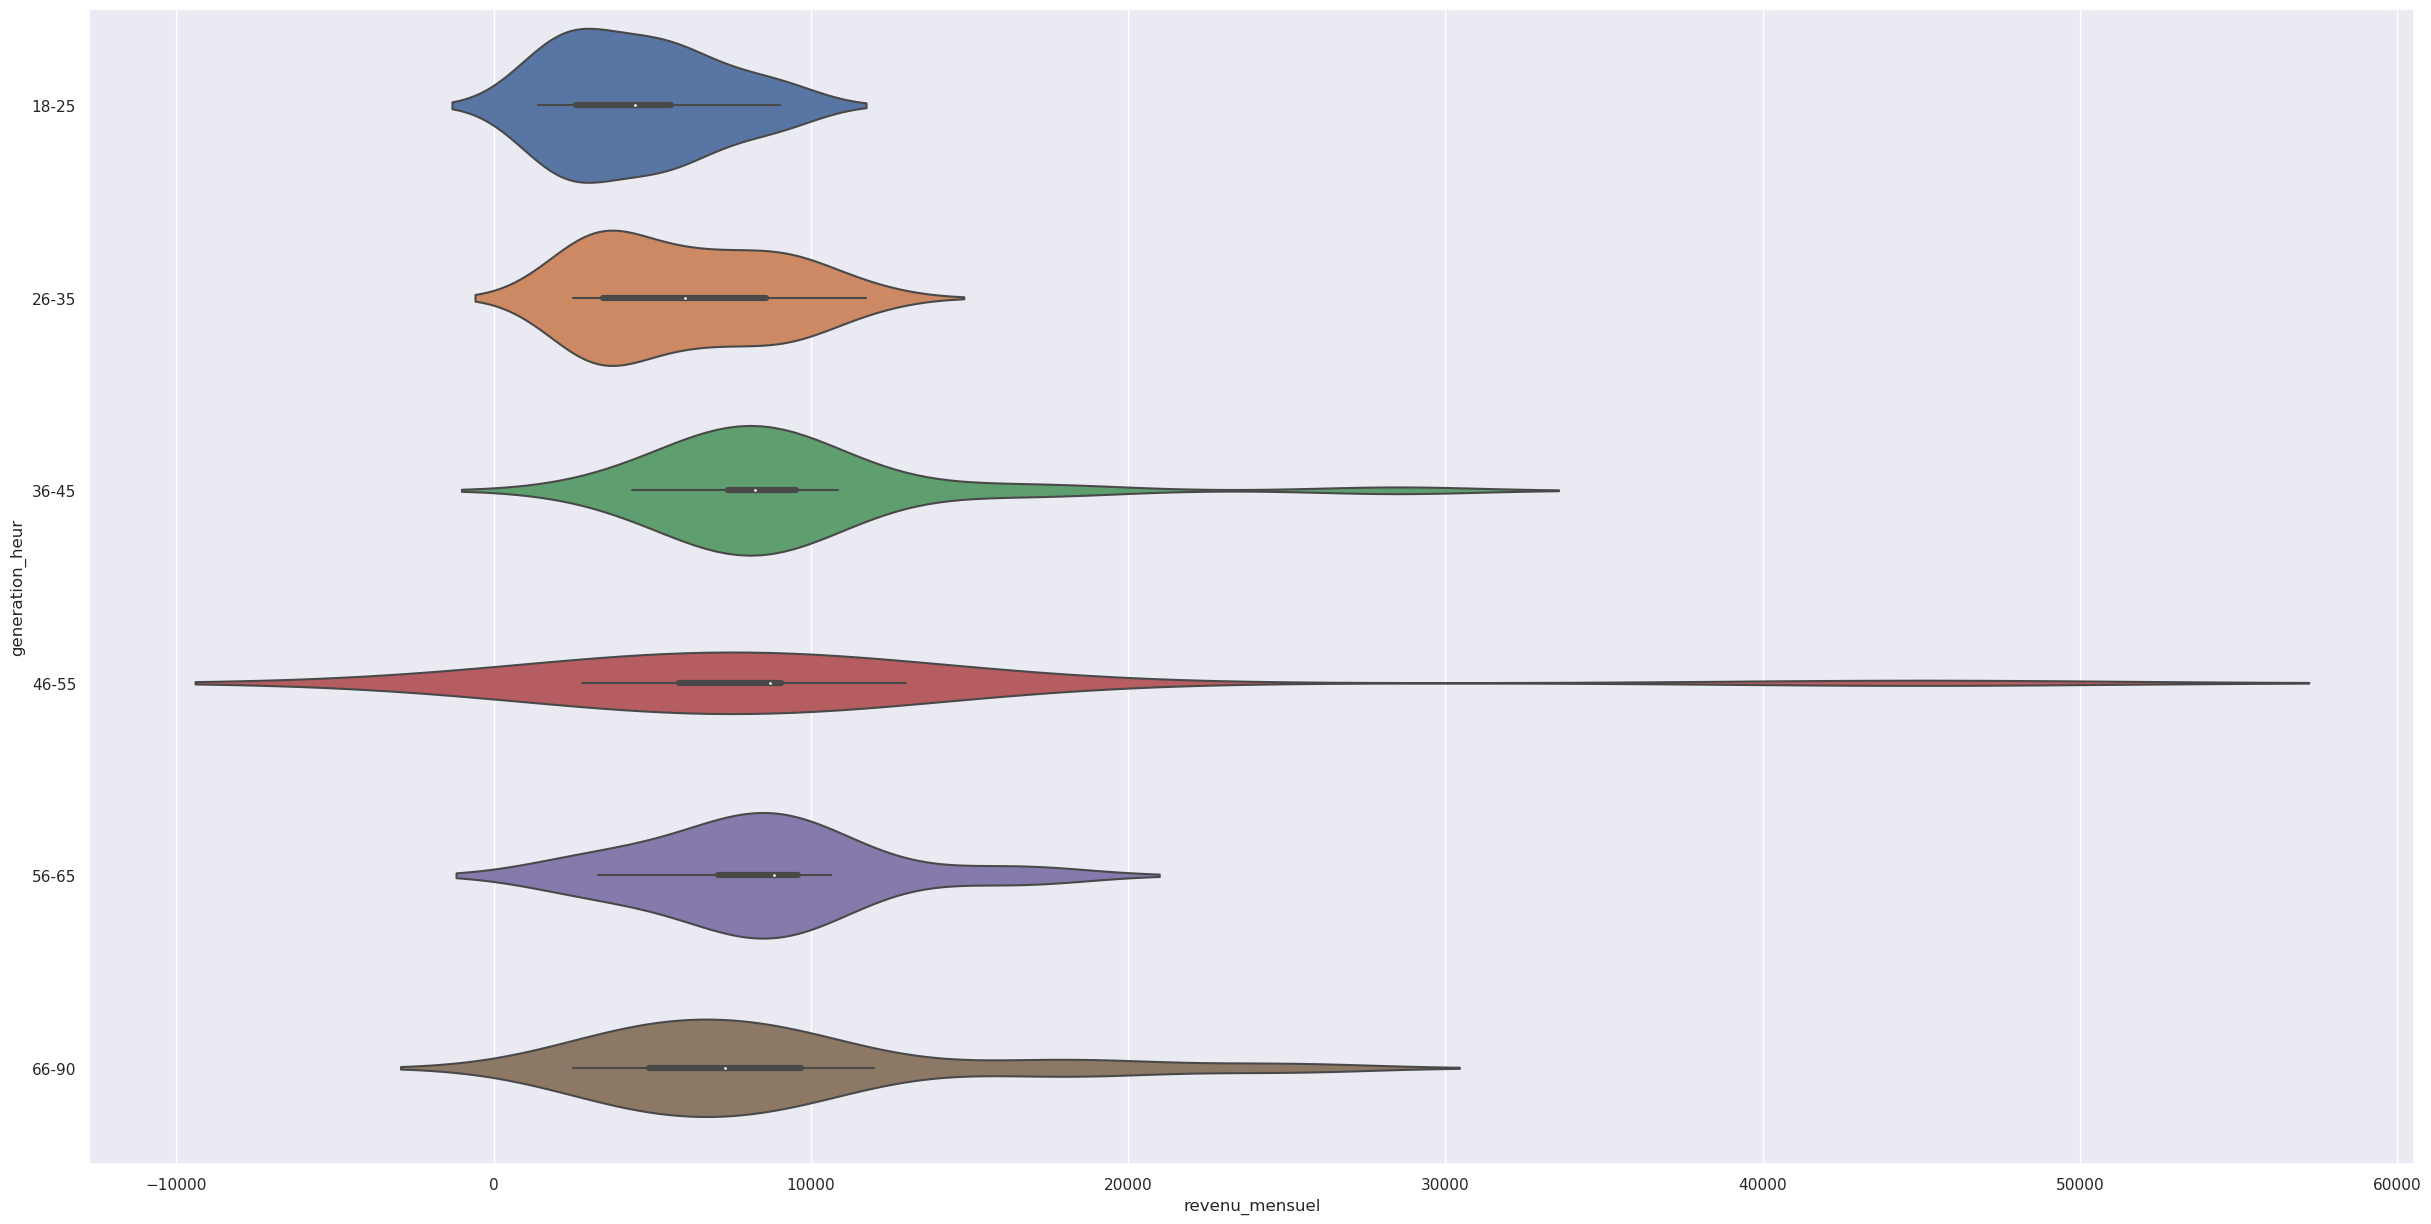

In [118]:
sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(30, 15)})

ax = sns.violinplot(x='revenu_mensuel', y ='generation_heur', data = obs.sort_values('generation_heur',ascending=False))

plt.show()